# Step1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Step2 : Getting the database for further processing and prediction 

In [16]:
globalP_data = pd.read_csv("global_power.csv")
globalP_data
globalP_data=pd.read_csv("global_power.csv")

#### Findings:  The dataset has 908 rows and 25 columns

We can observe that the dataset is comprised of 25 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

# Step 3: to understanding the database in better way i am going to replace primary_fuel as Fuel_type

In [71]:
globalP_data.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [4]:
globalP_data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 4: Exploratory Data Analysis

In [5]:
globalP_data.shape

(907, 27)

In [7]:
globalP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### Findings: The above info clearly showing that data columns have null values and also object datatype, need to be processed

In [8]:
globalP_data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### Findings: Some features that needs encoding are country, country_long, name, gppd_idnr,Fuel_Type,other_fuel1,other_fuel2, owner, source, url, geolocation_source,generation_data_source as they are object data type and the ML model needs numeric datatype.

In [9]:
globalP_data.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
Fuel_Type                     0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### Findings : It can be seen that there are high number of null values and will treat accordigly

In [11]:
globalP_data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

#### Findings :
 Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data_source have only one unique value. Also other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

# Step 5 : Feature Engineering (Feature Selection)

In [32]:
# Checking the count of the country
globalP_data["country"].value_counts()

IND    907
Name: country, dtype: int64

In [33]:
globalP_data["country_long"].value_counts()

India    907
Name: country_long, dtype: int64

In [34]:
globalP_data.drop(columns=["country","country_long"],axis=1,inplace=True)

In [35]:
# Dropping irrelevent columns 
globalP_data.drop(columns=["other_fuel2", "year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [36]:
globalP_data["name"].value_counts()

PANIPAT                    1
VISHNU PRAYAG              1
KOTESHWAR                  1
JOJBERA                    1
Sterling Karnataka site    1
                          ..
DLF                        1
KUTHUNGAL                  1
Andrha Lake Wind Farm      1
CHAMERA II                 1
SANJAY GANDHI              1
Name: name, Length: 907, dtype: int64

In [37]:
globalP_data["gppd_idnr"].value_counts()

WRI1026654    1
IND0000351    1
WRI1026136    1
IND0000002    1
WRI1026134    1
             ..
WRI1019886    1
WRI1019906    1
WRI1026656    1
IND0000175    1
WRI1026676    1
Name: gppd_idnr, Length: 907, dtype: int64

#### Findings:
Each and every country has unique identification number

In [38]:
#Dropping the columns that has no impact on the prediction
globalP_data.drop("name",axis=1,inplace=True) 
globalP_data.drop("gppd_idnr",axis=1,inplace=True)
globalP_data.drop("owner",axis=1,inplace=True)
globalP_data.drop("url",axis=1,inplace=True)

In [39]:
# Checking the shape of the database
globalP_data.shape

(907, 15)

In [40]:
# Checking null values again after feature selection
globalP_data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

<AxesSubplot:>

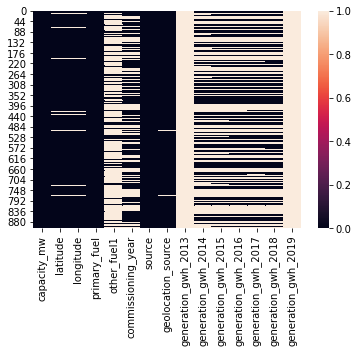

In [41]:
# Let's visualize the null values clearly
sns.heatmap(globalP_data.isnull())

#### Findings :
All the whitw line shown are the missing values of respective columns

In [42]:
#Checking the skewness of the dataset
globalP_data.skew().sort_values()

commissioning_year    -1.067949
latitude              -0.145866
longitude              1.112646
capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2018    3.476298
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2015    3.665904
generation_gwh_2013         NaN
generation_gwh_2019         NaN
dtype: float64

# Step 6: Handling the missing values by imputation Techniques

In [43]:
#checking the mean of latitude
globalP_data['latitude'].mean()

21.19791811846691

In [44]:
#checking the mode of other_fuel1 
globalP_data["other_fuel1"].mode()

0    Oil
dtype: object

In [45]:
#checking the mode of geolocation_source columns
globalP_data["geolocation_source"].mode()

0    WRI
dtype: object

In [53]:
# Filling the missing values
globalP_data["latitude"] = globalP_data["latitude"].fillna(globalP_data["latitude"].mean())
globalP_data["other_fuel1"] = globalP_data["other_fuel1"].fillna(globalP_data["other_fuel1"].mode()[0])
globalP_data["geolocation_source"] = globalP_data["geolocation_source"].fillna(globalP_data["geolocation_source"].mode()[0])
globalP_data["longitude"] = globalP_data["longitude"].fillna(globalP_data["longitude"].median())
globalP_data["commissioning_year"] = globalP_data["commissioning_year"].fillna(globalP_data["commissioning_year"].median())
globalP_data["generation_gwh_2013"] = globalP_data["generation_gwh_2013"].fillna(globalP_data["generation_gwh_2013"].median())
globalP_data["generation_gwh_2014"] = globalP_data["generation_gwh_2014"].fillna(globalP_data["generation_gwh_2014"].median())
globalP_data["generation_gwh_2015"] = globalP_data["generation_gwh_2015"].fillna(globalP_data["generation_gwh_2015"].median())
globalP_data["generation_gwh_2016"] = globalP_data["generation_gwh_2016"].fillna(globalP_data["generation_gwh_2016"].median())
globalP_data["generation_gwh_2017"] = globalP_data["generation_gwh_2017"].fillna(globalP_data["generation_gwh_2017"].median())
globalP_data["generation_gwh_2018"] = globalP_data["generation_gwh_2018"].fillna(globalP_data["generation_gwh_2018"].median())
globalP_data["generation_gwh_2019"] = globalP_data["generation_gwh_2019"].fillna(globalP_data["generation_gwh_2019"].median())

In [61]:
globalP_data.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [63]:
#globalP_data["generation_gwh_2019"] 

In [64]:
#globalP_data.drop("generation_gwh_2019",axis=1,inplace=True)

In [65]:
#globalP_data.drop("generation_gwh_2013",axis=1,inplace=True)

<AxesSubplot:>

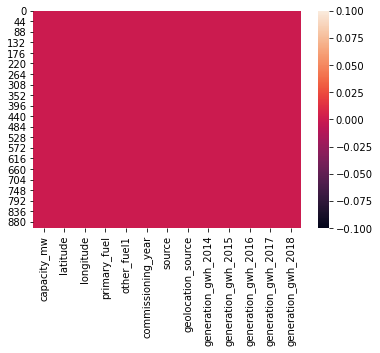

In [67]:
sns.heatmap(globalP_data.isnull())

In [68]:
globalP_data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [69]:
globalP_data['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [72]:
# Checking the list of counts of primary_fuel
globalP_data['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

In [74]:
# Checking the uniqueness of primary_fuel
globalP_data["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [75]:
globalP_data['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [76]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
globalP_data["Power_plant_age"] = 2018 - globalP_data["commissioning_year"]
globalP_data.drop(columns=["commissioning_year"], inplace = True)

In [77]:
globalP_data.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# Step 7 : Statistical Description of the DataSet

In [78]:
globalP_data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


#### Findings :

Here i can see the statistical analysis of the dataset (numerical only)

i can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.


In [79]:
#checking the categorical columns
cat_col=[]
for i in globalP_data.dtypes.index:
    if globalP_data.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


In [80]:
#checking the numeric columns for visualization
num_col=[]
for i in globalP_data.dtypes.index:
    if globalP_data.dtypes[i]!='object':
        num_col.append(i)
print(num_col) 

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Step 8: Data Visualization 

#### 1. Univariate Analysis -( Categorical Column Visualization)

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


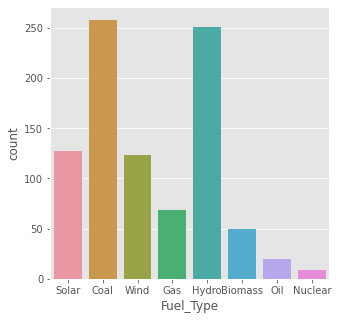

In [97]:
print(globalP_data['Fuel_Type'].value_counts())   #visualizing the fuel types in Fuel_Type
plt.figure(figsize=(5,5))
sns.countplot(globalP_data['Fuel_Type'])
plt.show()

#### Findings :
Here we can see that the 'Coal' energy source is used the highest in the generation of electricity. Then the next energy source used is the 'HydroBiomass' and followed by the other energy sources.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


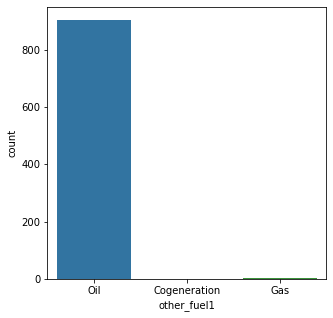

In [82]:
#checking the count of fuel1
print(globalP_data['other_fuel1'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(globalP_data['other_fuel1'])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


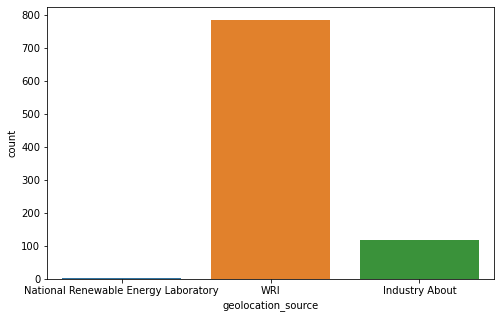

In [83]:
# Visualizing the counts of owner
print(globalP_data["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(globalP_data['geolocation_source'])
plt.show()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64


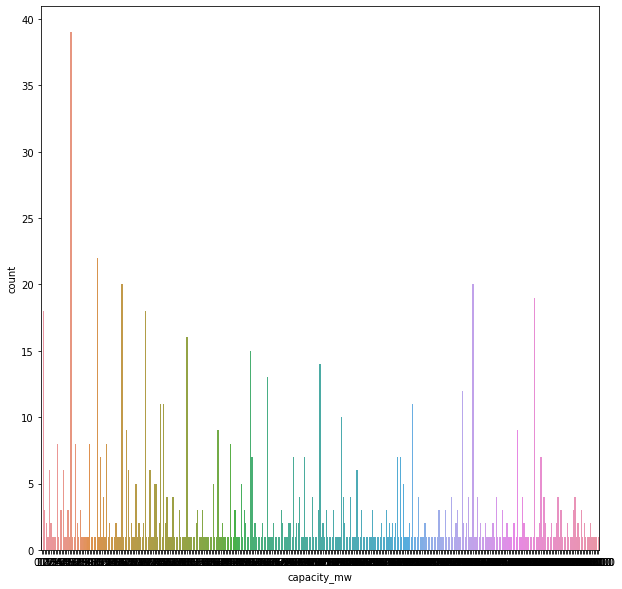

In [84]:
print(globalP_data['capacity_mw'].value_counts())   #visualizing the capacity_mw
plt.figure(figsize=(10,10))
sns.countplot(globalP_data['capacity_mw'])
plt.show()

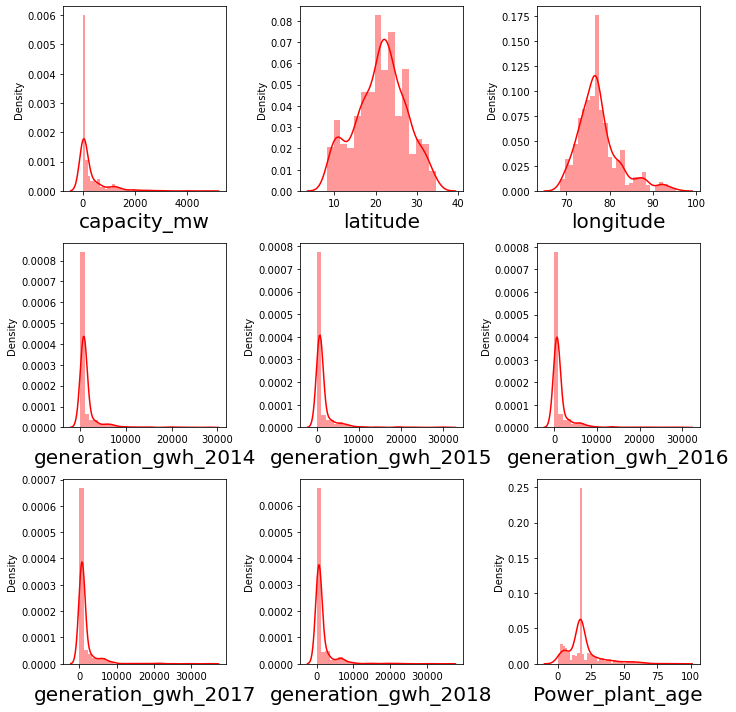

In [87]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(globalP_data[column],color="r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis 

### Corealtion between features and targer 'Capacity_mw'

<AxesSubplot:title={'center':'Comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

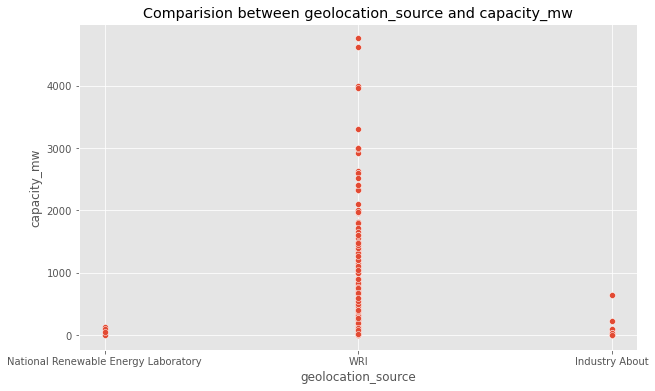

In [88]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between geolocation_source and capacity_mw')
sns.scatterplot(globalP_data['geolocation_source'],globalP_data["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

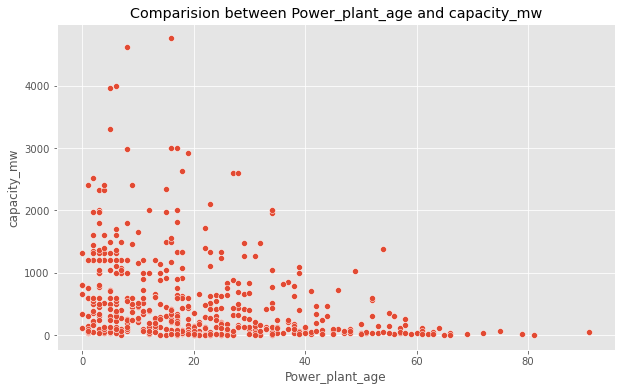

In [89]:
#Checking the relation between power plant age and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.scatterplot(globalP_data['Power_plant_age'],globalP_data["capacity_mw"])

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

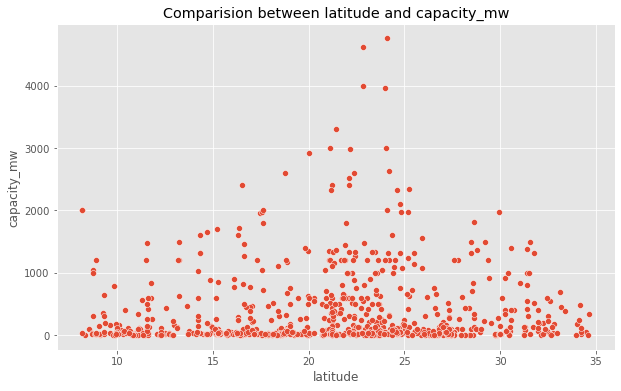

In [90]:
# Checking the relation between feature latitude and targer capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(globalP_data['latitude'],globalP_data["capacity_mw"])

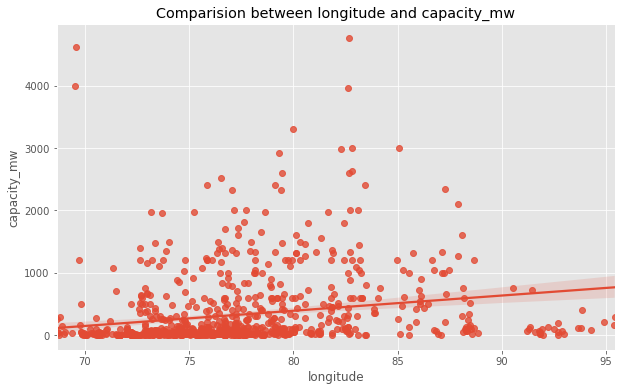

In [91]:
# Checking the relationship between target longitude and capacity_mw
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(globalP_data['longitude'],globalP_data["capacity_mw"]);

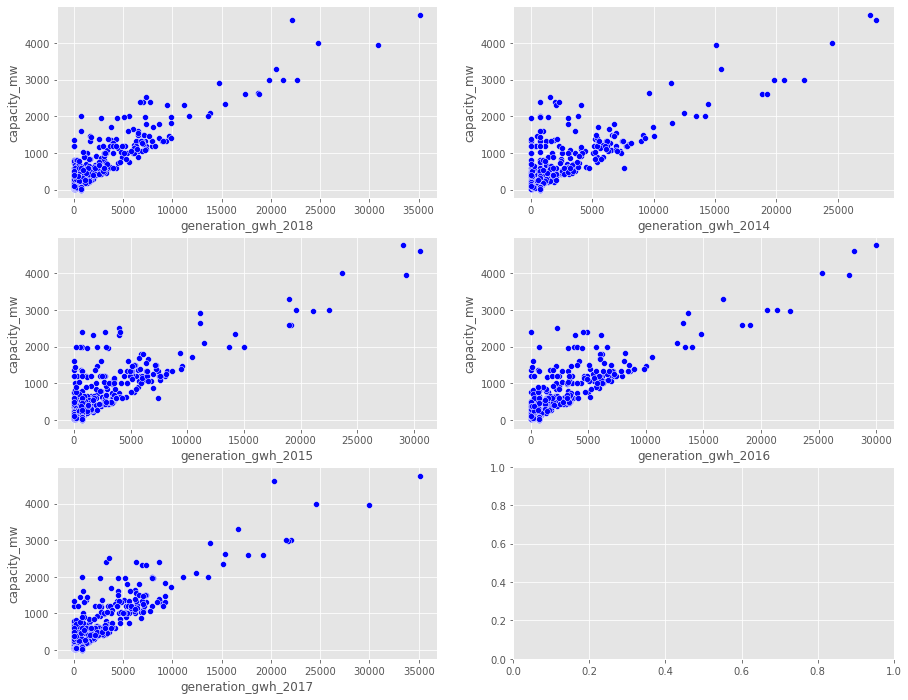

In [95]:
fig,axes=plt.subplots(3,2,figsize=(15,12))


#Checking the relation between feature generation_gwh_2014 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,1],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2015 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[1,0],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2016 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,1],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2017 and targer capacity_mw
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[2,0],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2018 and targer capacity_mw
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw",ax=axes[0,0],data = globalP_data,color="b")


plt.show()

# Step 9: Co-relation between features and target 'Fuel_Types'

<AxesSubplot:title={'center':'Comparision between Power_plant_age and Fuel_Type'}, xlabel='Power_plant_age', ylabel='Fuel_Type'>

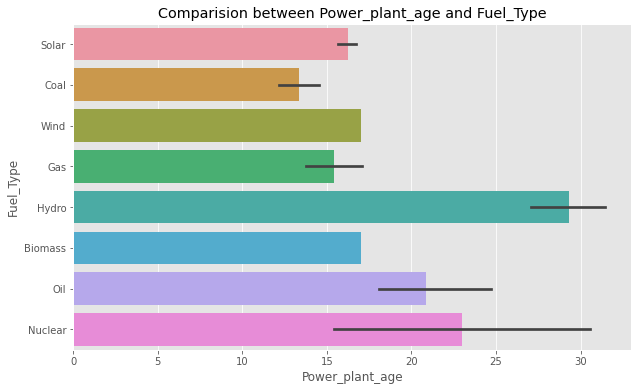

In [99]:
#Checking the relation between target fuel_type and variable Power_plant_age
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and Fuel_Type')
sns.barplot(globalP_data['Power_plant_age'],globalP_data["Fuel_Type"])

# 

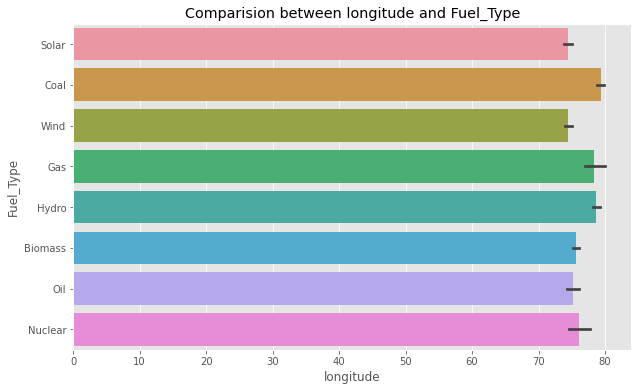

In [100]:
# Checking the relationship between target longitude and Fuel_Type
plt.figure(figsize=[10,6])
plt.title('Comparision between longitude and Fuel_Type')
sns.barplot(globalP_data['longitude'],globalP_data["Fuel_Type"]);

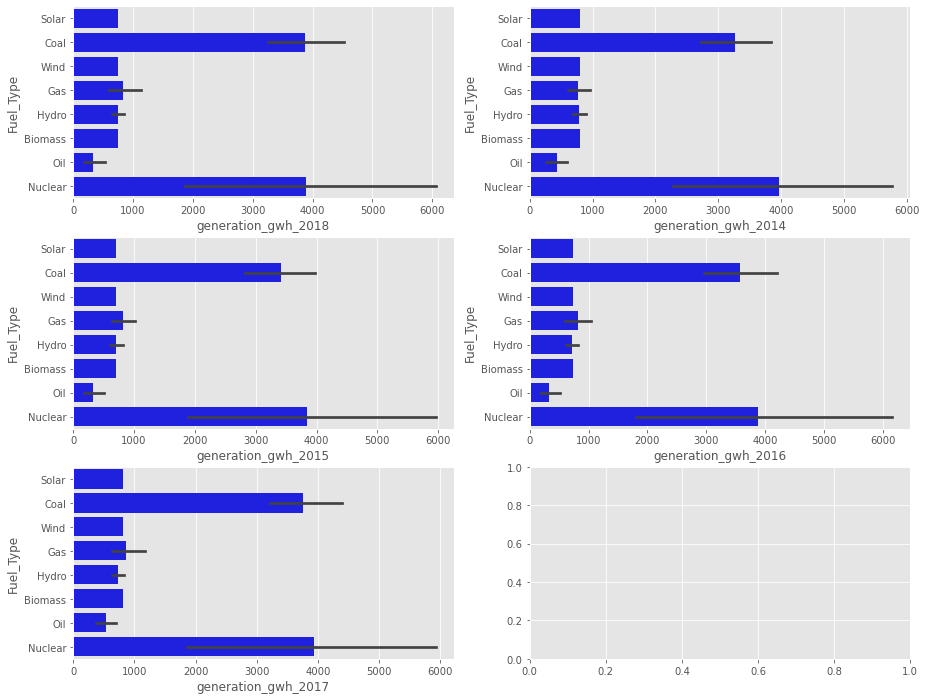

In [102]:
fig,axes=plt.subplots(3,2,figsize=(15,12))


#Checking the relation between feature generation_gwh_2014 and targer Fuel_Type
sns.barplot(x='generation_gwh_2014',y='Fuel_Type',ax=axes[0,1],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2015 and targer Fuel_Type
sns.barplot(x='generation_gwh_2015',y='Fuel_Type',ax=axes[1,0],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2016 and targer Fuel_Type
sns.barplot(x='generation_gwh_2016',y='Fuel_Type',ax=axes[1,1],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2017 and targer Fuel_Type
sns.barplot(x='generation_gwh_2017',y='Fuel_Type',ax=axes[2,0],data=globalP_data,color="b")

#Checking the relation between feature generation_gwh_2018 and targer Fuel_Type
sns.barplot(x = "generation_gwh_2018", y = "Fuel_Type",ax=axes[0,0],data = globalP_data,color="b")

plt.show()

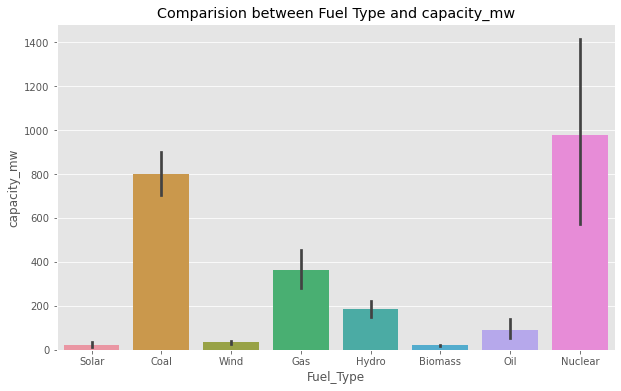

In [104]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = globalP_data)
plt.show()

# Step 10: Label Encoding

In [105]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [107]:
LE=LabelEncoder()
globalP_data[categorical_col]= globalP_data[categorical_col].apply(LE.fit_transform)

In [108]:
globalP_data[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Step 11: Identifying the outliers

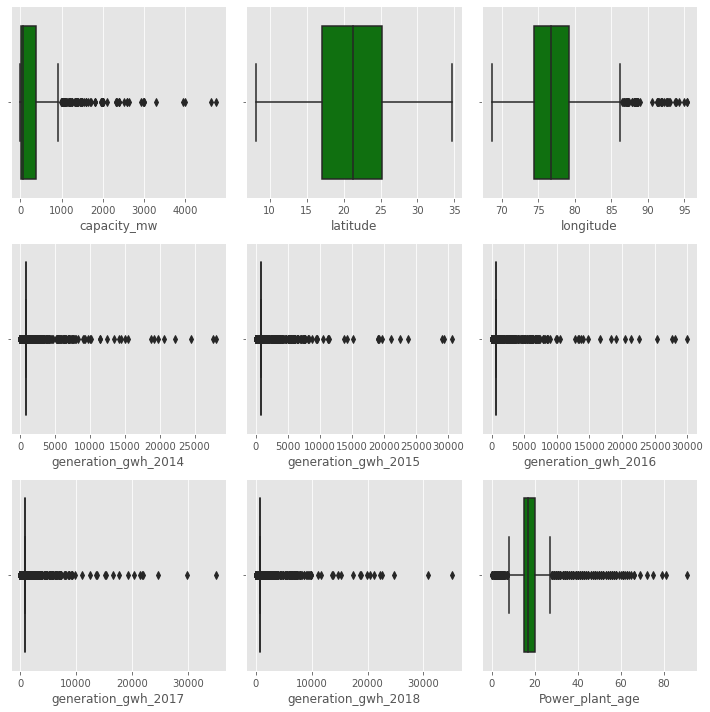

In [111]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(globalP_data[column],color="green")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [112]:
globalP_data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Power_plant_age'],
      dtype='object')

In [115]:
# Features containing outliers
features = globalP_data[[ 'longitude', 'generation_gwh_2018', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','Power_plant_age' ]]

In [116]:
z=np.abs(zscore(features))

z

array([[0.86991672, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.93307603],
       [0.58558978, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       [1.67356683, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       ...,
       [0.38359152, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       [0.76456427, 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871],
       [0.0103269 , 0.28839399, 0.25702178, ..., 0.27573671, 0.27556459,
        0.17269871]])

In [118]:
# Creating new dataframe
new_df = globalP_data[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [119]:
globalP_data.shape

(907, 13)

In [120]:
new_df.shape

(851, 13)

# Step 12: Correlation between the target variable and features using HEAT map

In [121]:
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'Fuel_Type'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'source'),
  Text(0, 6.5, 'geolocation_source'),
  Text(0, 7.5, 'generation_gwh_2014'),
  Text(0, 8.5, 'generation_gwh_2015'),
  Text(0, 9.5, 'generation_gwh_2016'),
  Text(0, 10.5, 'generation_gwh_2017'),
  Text(0, 11.5, 'generation_gwh_2018'),
  Text(0, 12.5, 'Power_plant_age')])

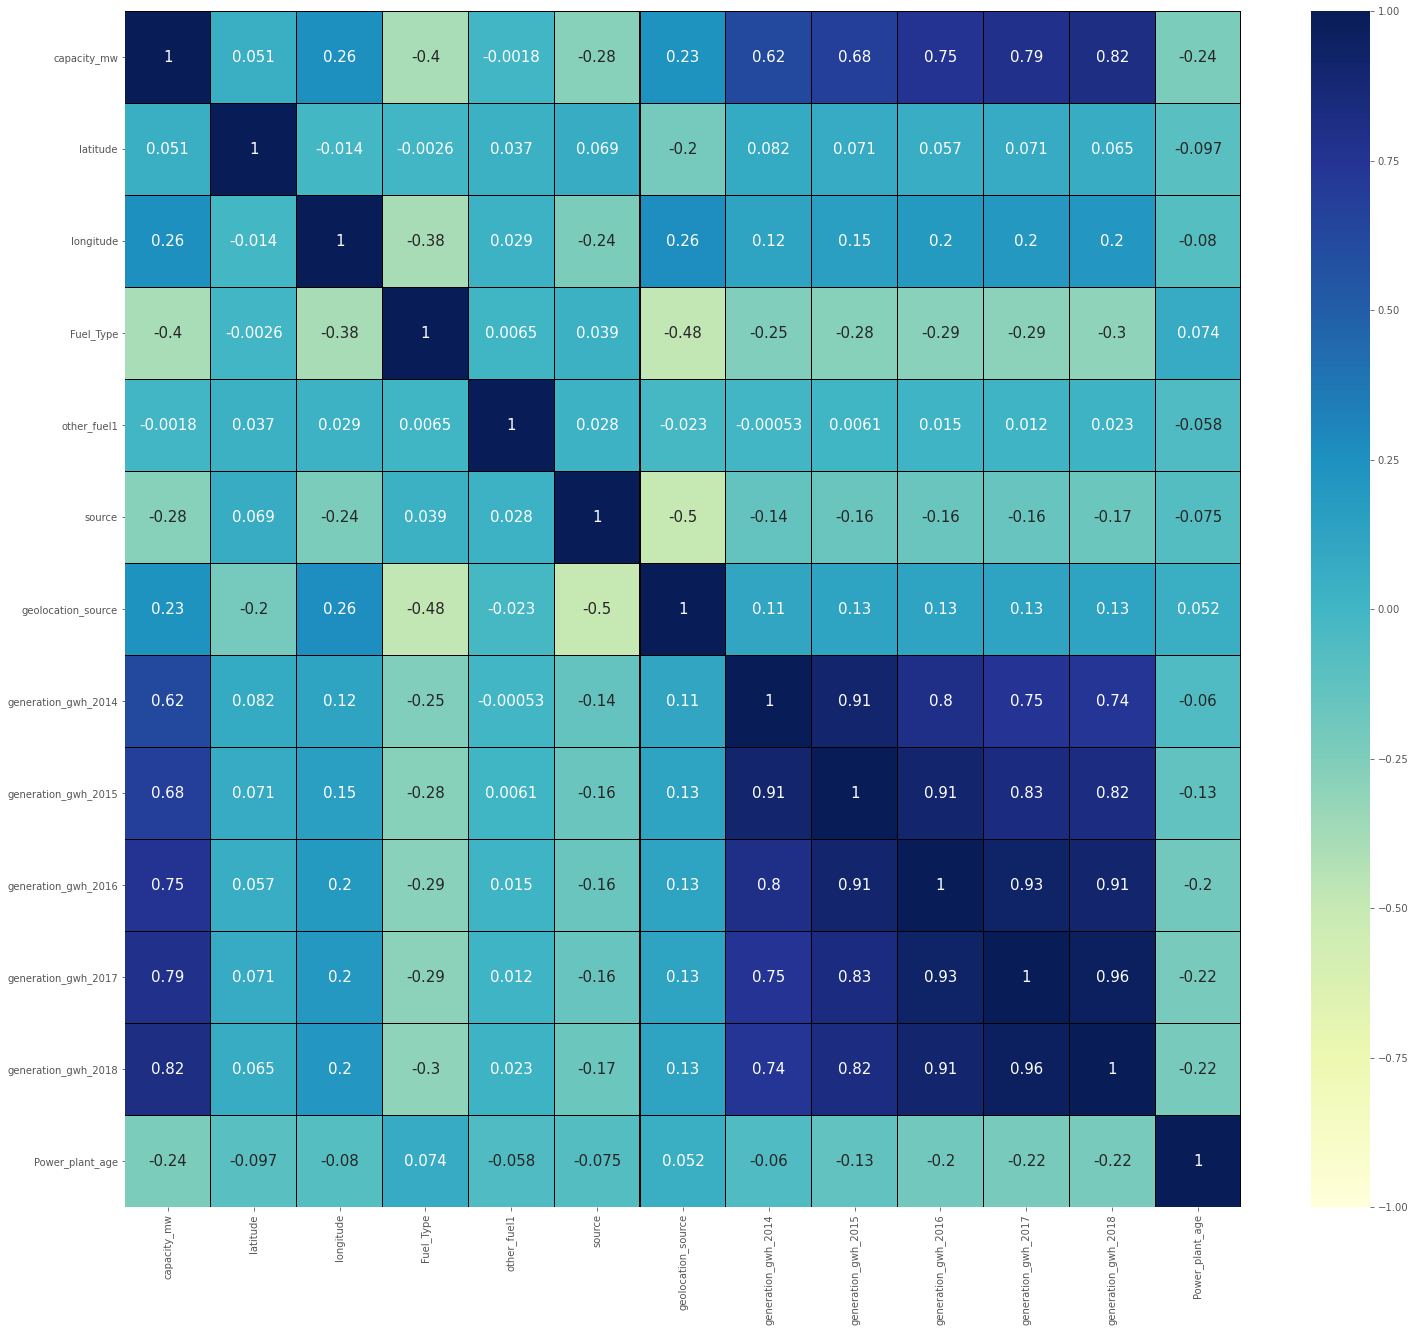

In [122]:
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

## Findings: 
Here we can see the co-relation between all the features and the features and targets

1. The label capacity_mw is highly positively correlated with the features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014, generation_gwh_2013. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

2. The label Fuel_Type is less correlated with Power_plant_age and source. The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

3. From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

4. Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.


# Step 13: Visualizing the correlation between label and features using bar plot

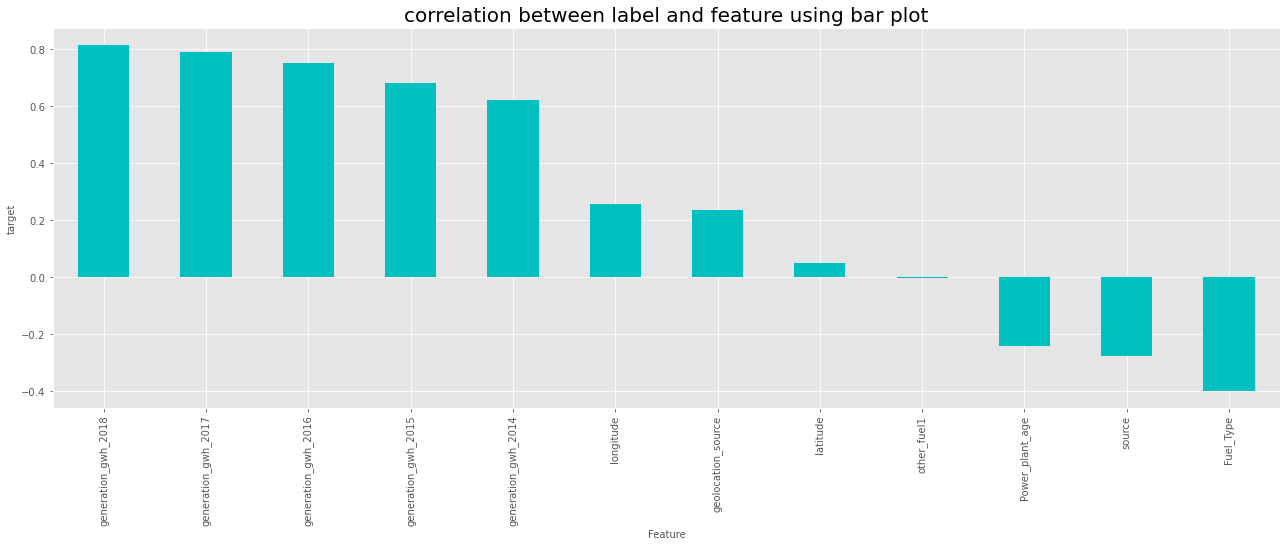

In [123]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Step 14: Visualizing the correlation between label and features using bar pl

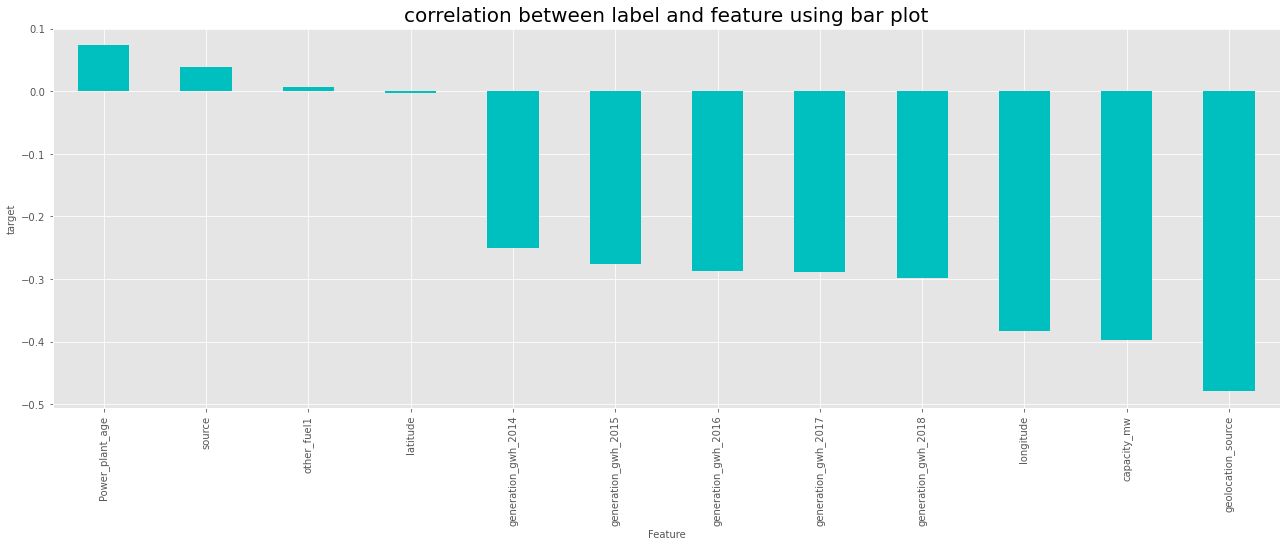

In [124]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [125]:
#Dropping irrelevent features
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [126]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# Step 15 Model Buidling process

In [127]:
# Seperating the features and target variable
x=new_df.drop('capacity_mw', axis=1)
y=new_df["capacity_mw"]

In [128]:
x.shape

(851, 10)

In [129]:
y.shape

(851,)

In [130]:
#Checking for skewness
x.skew().sort_values()

geolocation_source    -2.066536
Fuel_Type              0.413759
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

## Findings 

The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2013 generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 Power_plant_age

In [131]:
# Removing skewness using yeo-johnson method
skew = ['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [132]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.758384


In [133]:
x.skew()

longitude             -0.000128
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

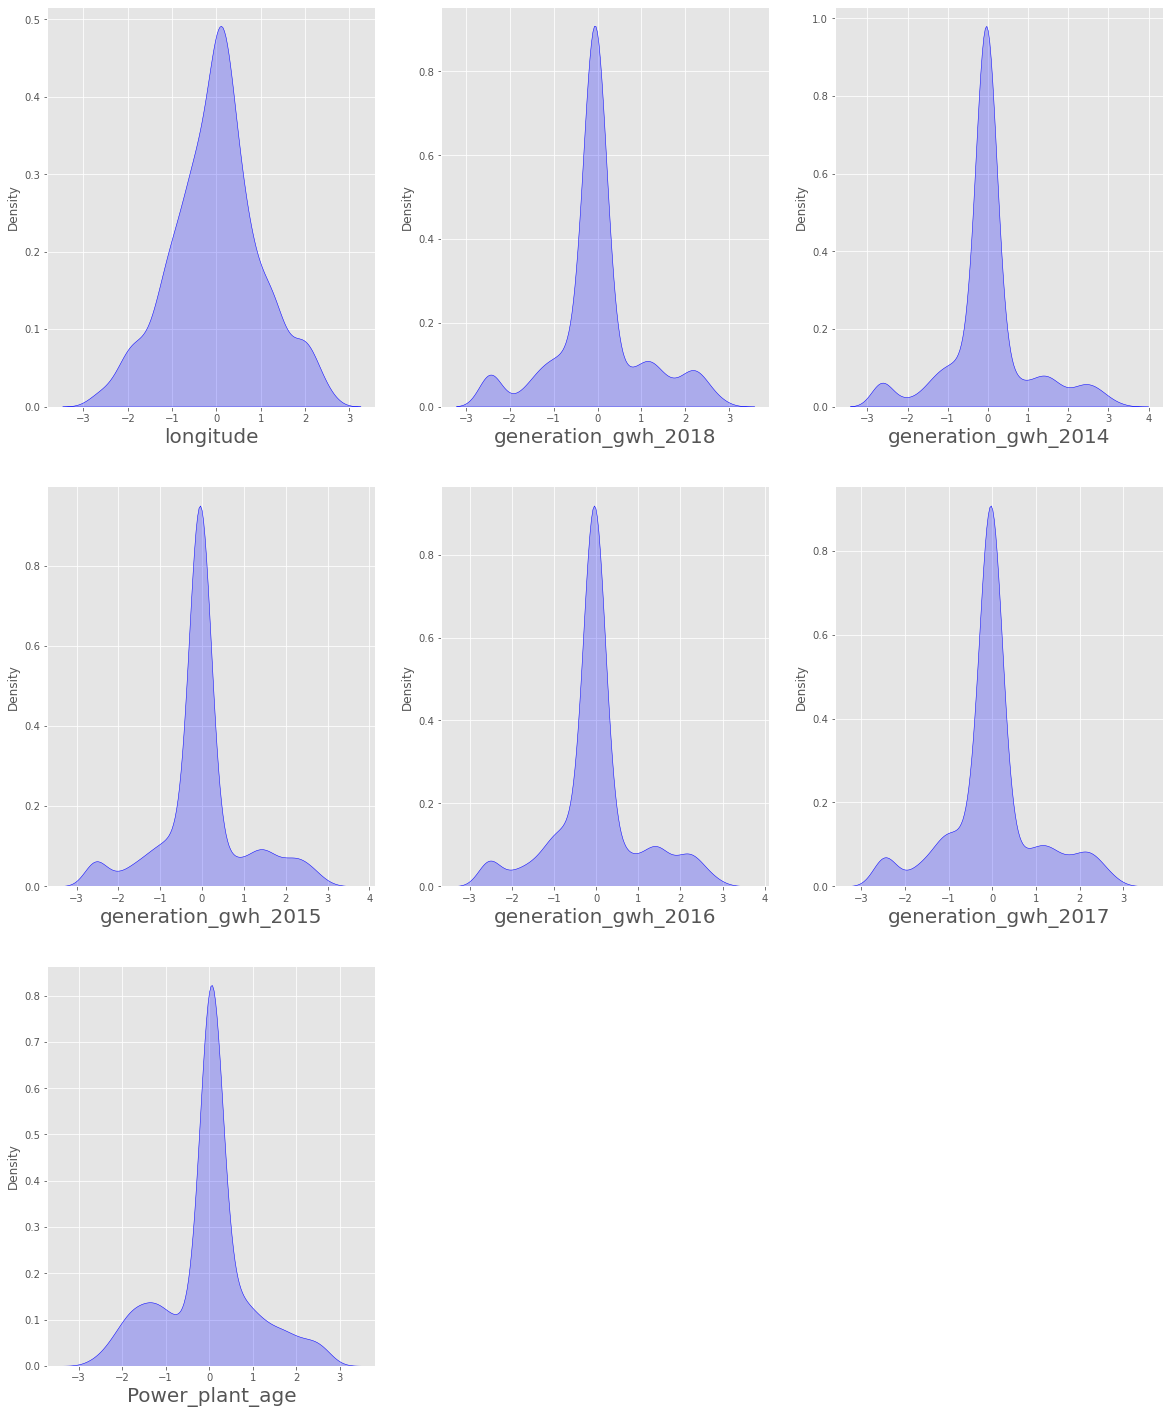

In [135]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [136]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [137]:
#Checking Multi-colinearity
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.309948,longitude
1,1.682645,Fuel_Type
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


In [138]:
#gettig the best random state
maxAccu=0
maxRS=0
for i in range(1,100): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.8444088526206361 Random_State 27


# Step16 : Train and Test Split 

In [139]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=maxRS)

# Model1 : Linear Regression

In [140]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

R2_score: 0.5745530314028315
MAE: 208.54781689014442
MSE: 79885.05916257405
RMSE: 282.6394508248522


# Model2 : Random Forest Regressor

In [141]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_score:',r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predrf))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predrf))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_score: 0.8452268236051933
MAE: 91.77594825002808
MSE: 29061.352567270187
RMSE: 170.47390582511503


# Model 3: Gradient Boosting Regressor

In [146]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.8239944288329155
MAE: 101.6076507007216
MSE: 33048.10353211848
RMSE: 181.791373646052


# Model 4: Bagging Regressor

In [147]:
br=BaggingRegressor()
br.fit(x_train,y_train)

predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predbr))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predbr))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.8247331671599045
MAE: 94.97406218532157
MSE: 32909.392577961786
RMSE: 181.40946110377425


# Step 17 : Cross- Validation

In [149]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())


#Checking the cv score for GradientBoostingRegressor
print(cross_val_score(gb,x,y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print(cross_val_score(br,x,y,cv=5).mean())

0.5440434259567007
0.7763811994867573
0.7503760894338782
0.7742076144579788


# Step 18 : Hyper Parameter Tuning for the model with best acc and cv score

In [151]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [152]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [153]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [154]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [155]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity_mw.fit(x_train, y_train)
pred = capacity_mw.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 84.5604104345787
RMSE value: 170.47390582511503


# Step 19 Saving the model 

In [156]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [157]:
mod = joblib.load('Global_Power_Plant_capacity_mw.pkl')

In [158]:
print(mod.predict(x_test))

[ 150.7009549    26.6628698   109.09936734  119.63544181   30.69433719
   26.37097603 1491.00401916   34.39910783   26.45186339  797.22538539
   44.23853345   47.29356361  698.52657687   33.80887162 1291.41464353
 1234.69831464  181.67491595  579.9558182    26.39499332   71.82506073
   45.34902904   45.71056909   34.14511481  234.90425406   26.50256352
  115.60728842   34.60339787   57.60006709  201.26242211  580.0419118
   46.56458347 1112.73457165   48.82498289  465.57457024   27.88698592
   55.01473081  107.32757768   26.50355601 1423.02355464   27.59623642
 1499.1693678    38.46278612  471.70526256  121.38604435  769.71342435
 1276.10673562   34.39910783  187.07596125  177.28801715  143.77035806
   26.39499332   47.04371194 1162.83851261  101.13246222   26.38961948
   33.77430753  197.4287535   147.36045713   48.11958899 1072.10112593
 1092.90186417   46.22140243  220.04584466  114.09322576   45.44420245
  678.06328159   46.06523531 1255.18618696   46.55836672  163.94495757
   33.7

# Prediction for Fuel_Type

In [159]:
#Seperating the Dataset into Features and Label(Fuel_Type)
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [160]:
x_df.shape

(851, 10)

In [161]:
y_df.shape

(851,)

In [163]:
#Checking the Skewness of x_df
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude              0.945877
Power_plant_age        1.280800
source                 1.734252
capacity_mw            2.170245
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
generation_gwh_2016    2.645786
generation_gwh_2015    2.714999
generation_gwh_2014    2.943026
dtype: float64

In [166]:
#Removing the skewness
skew = ['capacity_mw','longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [167]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-1.677389,-0.922012,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,-1.081421
1,0.220284,-0.499829,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
2,-0.274381,-2.377759,-0.057181,-0.044061,-0.049141,-0.046103,-0.035226,0.046187
3,0.391670,2.430594,-0.194159,-0.268922,0.093773,0.105691,-0.199692,-0.245810
4,1.731859,1.261979,2.347272,1.426798,2.286603,2.276671,1.983083,-1.758384


In [168]:
x_df.skew().sort_values()

geolocation_source    -2.066536
longitude             -0.000128
capacity_mw            0.016303
Power_plant_age        0.043734
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
generation_gwh_2016    0.147035
generation_gwh_2015    0.163587
generation_gwh_2014    0.232399
source                 1.734252
dtype: float64

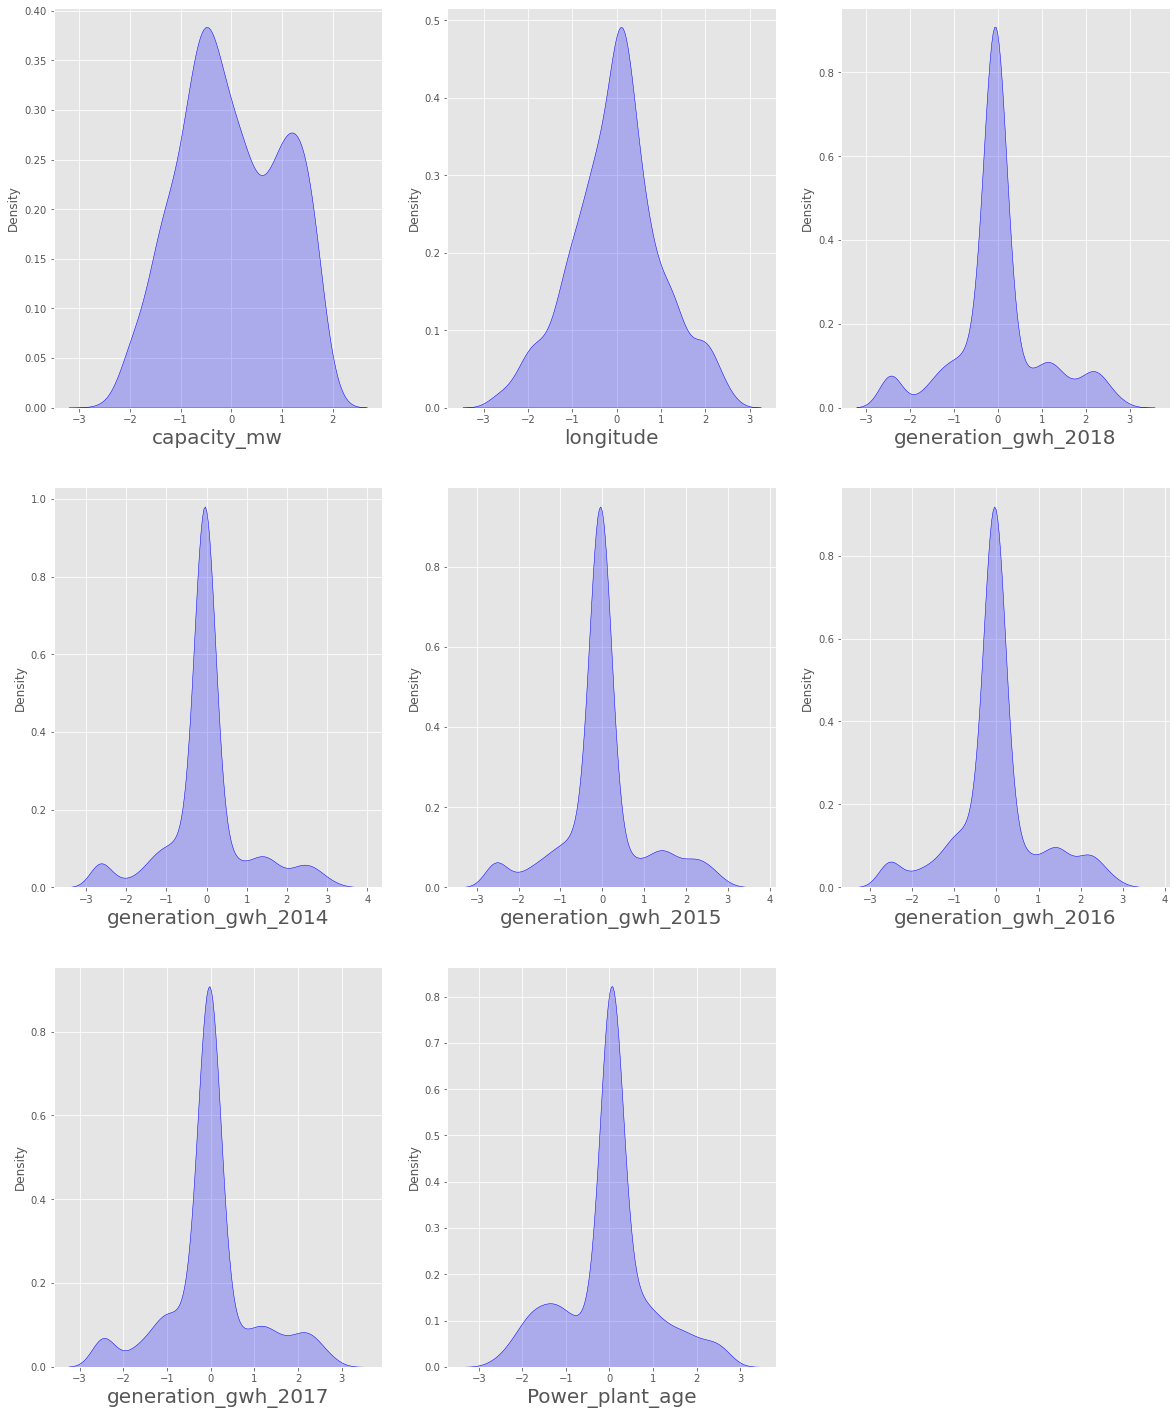

In [169]:
#Lets visualize the data

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [170]:
#Feature Scalling
scaler=StandardScaler()
x_df=pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


# Step 20: Checking Multicolinearity

In [171]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


In [172]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

In [173]:
#OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_df, y_df = sm.fit_resample(x_df,y_df)

In [174]:
y_df.value_counts()

0    238
1    238
2    238
3    238
4    238
5    238
6    238
7    238
Name: Fuel_Type, dtype: int64

In [175]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [176]:
#Getting the best random state
maxAccu=0
maxRS=0

for i in range(1,200):
    x_df_train,x_df_test, y_df_train, y_df_test=train_test_split(x_df,y_df,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_df_train,y_df_train)
    pred=rfc.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS) 

Best accuracy is  0.9405594405594405  on Random_state  51


# Step 21 : Creating train_test_split

In [177]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

# Model 1. Logistic Regression

In [178]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_df_train,y_df_train)

#Prediction
predlog = log.predict(x_df_test)

print(accuracy_score(y_df_test, predlog))
print(confusion_matrix(y_df_test, predlog))
print(classification_report(y_df_test,predlog))

0.7202797202797203
[[67  0  0  0  0  0  0  6]
 [ 9 24  1  8 21  3  0  2]
 [ 1 12 18 17 12 12  0  1]
 [ 0  5  2 28  1  4  0 13]
 [ 0  2  0  0 78  1  0  0]
 [ 3  3  0  0  1 52  0  6]
 [ 0  2  0  0  0  0 78  0]
 [ 0  0  0 12  0  0  0 67]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        73
           1       0.50      0.35      0.41        68
           2       0.86      0.25      0.38        73
           3       0.43      0.53      0.47        53
           4       0.69      0.96      0.80        81
           5       0.72      0.80      0.76        65
           6       1.00      0.97      0.99        80
           7       0.71      0.85      0.77        79

    accuracy                           0.72       572
   macro avg       0.72      0.70      0.68       572
weighted avg       0.73      0.72      0.70       572



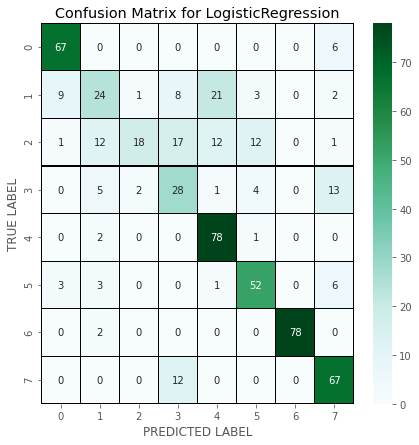

In [179]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_df_test,predlog)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Model2.Random Forest Classifier

In [180]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_df_train,y_df_train)

# Prediction
predrf = rf.predict(x_df_test)

print(accuracy_score(y_df_test, predrf))
print(confusion_matrix(y_df_test, predrf))
print(classification_report(y_df_test,predrf))

0.9335664335664335
[[73  0  0  0  0  0  0  0]
 [ 4 48  2 10  2  2  0  0]
 [ 0  4 62  3  1  3  0  0]
 [ 3  0  0 50  0  0  0  0]
 [ 0  1  0  1 79  0  0  0]
 [ 0  1  1  0  0 63  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        73
           1       0.89      0.71      0.79        68
           2       0.95      0.85      0.90        73
           3       0.78      0.94      0.85        53
           4       0.96      0.98      0.97        81
           5       0.93      0.97      0.95        65
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        79

    accuracy                           0.93       572
   macro avg       0.93      0.93      0.93       572
weighted avg       0.94      0.93      0.93       572



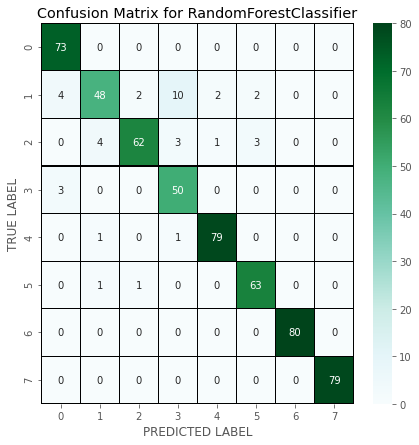

In [181]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predrf)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Model 3: Decission Tree Classifier

In [182]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_df_train,y_df_train)

#Prediction
preddtc = dtc.predict(x_df_test)

print(accuracy_score(y_df_test, preddtc))
print(confusion_matrix(y_df_test, preddtc))
print(classification_report(y_df_test,preddtc))

0.8776223776223776
[[69  4  0  0  0  0  0  0]
 [ 2 45  4  7  6  4  0  0]
 [ 1  8 45 12  2  5  0  0]
 [ 0  1  4 47  0  1  0  0]
 [ 0  2  2  2 75  0  0  0]
 [ 0  0  3  0  0 62  0  0]
 [ 0  0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.75      0.66      0.70        68
           2       0.78      0.62      0.69        73
           3       0.69      0.89      0.78        53
           4       0.90      0.93      0.91        81
           5       0.86      0.95      0.91        65
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        79

    accuracy                           0.88       572
   macro avg       0.87      0.87      0.87       572
weighted avg       0.88      0.88      0.88       572



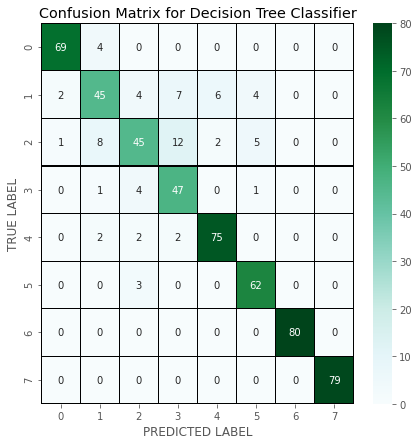

In [183]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,preddtc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Model 4 : Support Vector Machine Classifier

In [184]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.8024475524475524
[[62  0  0  0  0  1  0 10]
 [ 8 33  3  4 12  2  0  6]
 [ 1  6 42  8  2 13  0  1]
 [ 0  2  7 31  0  0  0 13]
 [ 0  1  0  1 79  0  0  0]
 [ 0  3  0  0  0 56  0  6]
 [ 0  1  0  0  0  0 79  0]
 [ 0  0  2  0  0  0  0 77]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        73
           1       0.72      0.49      0.58        68
           2       0.78      0.58      0.66        73
           3       0.70      0.58      0.64        53
           4       0.85      0.98      0.91        81
           5       0.78      0.86      0.82        65
           6       1.00      0.99      0.99        80
           7       0.68      0.97      0.80        79

    accuracy                           0.80       572
   macro avg       0.80      0.79      0.78       572
weighted avg       0.80      0.80      0.79       572



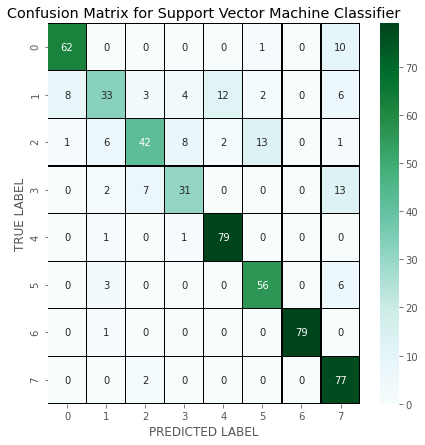

In [185]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Model 5: Gradient Boosting Classifier

In [186]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# Prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test,predGB))

0.9108391608391608
[[72  1  0  0  0  0  0  0]
 [ 5 47  2  6  6  2  0  0]
 [ 0  4 56  7  0  6  0  0]
 [ 1  1  5 46  0  0  0  0]
 [ 0  0  0  2 79  0  0  0]
 [ 0  1  1  0  0 63  0  0]
 [ 0  1  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.85      0.69      0.76        68
           2       0.88      0.77      0.82        73
           3       0.75      0.87      0.81        53
           4       0.93      0.98      0.95        81
           5       0.89      0.97      0.93        65
           6       1.00      0.99      0.99        80
           7       1.00      1.00      1.00        79

    accuracy                           0.91       572
   macro avg       0.90      0.91      0.90       572
weighted avg       0.91      0.91      0.91       572



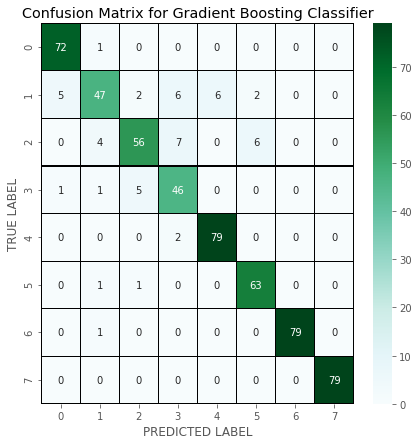

In [187]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Step 22: Cross_Validation_Score

In [188]:
#cv score for Logistic Regression
print(cross_val_score(log,x_df,y_df,cv=5).mean())

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x_df,y_df,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(rf,x_df,y_df,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_df,y_df,cv=5).mean())

0.7121895289404614
0.8681723995026938
0.9185895841967122
0.7951636966431828
0.9017861583091588


# Step 23: HyperParameter Tuning for the model with best score

In [190]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [191]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [192]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [193]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [195]:
fuel_type =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

89.16083916083916


# Step 24 Plotting ROC and compare AUC for the final model

In [196]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

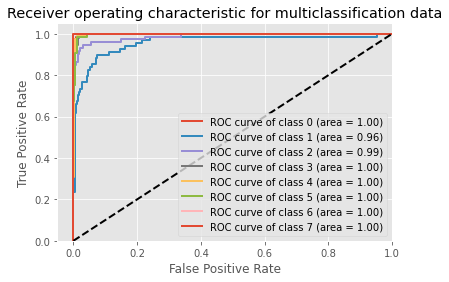

In [197]:
classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

In [198]:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

In [199]:
mod = joblib.load('Global_Power_Plant_Fuel_Type.pkl')

In [200]:
print(mod.predict(x_test))

[2 6 3 3 6 6 1 7 6 3 6 0 1 7 1 1 1 2 6 1 3 5 7 3 6 3 7 5 5 1 5 1 6 3 6 6 3
 6 1 6 1 6 3 3 1 1 7 5 3 3 6 5 1 3 6 7 3 3 3 4 1 5 3 3 1 1 5 1 5 2 7 1 3 7
 2 3 1 0 3 3 7 1 5 5 2 3 7 3 7 3 3 1 5 5 3 3 5 3 5 1 3 5 7 6 3 1 1 7 5 5 7
 4 2 2 7 3 6 1 6 2 7 5 5 7 2 3 6 3 6 3 2 7 3 3 5 3 2 7 5 5 2 5 7 4 5 3 1 2
 1 1 5 3 5 7 6 3 3 2 6 3 3 6 4 3 5 2 7 3 7 3 5 1 5 3 5 6 3 5 3 4 3 6 3 7 3
 7 3 1 5 7 5 7 3 7 5 5 6 3 5 5 2 1 6 6 3 3 6 3 3 5 6 7 5 3 1 3 6 7 7 3 1 2
 3 1 3 2 6 4 1 3 2 1 6 3 7 1 3 5 3 2 1 6 4 1 5 3 1 4 3 6 3 6 3 3 3 6]


# END 